In [1]:
import naima
import CRadpy # type: ignore
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import agnpy

In [2]:
def function(energy):
    amplitude = 1e36 * u.Unit("1/eV")
    E0        = 1 * u.TeV
    index     = 2.1
    cutoff    = 13 * u.TeV
    return amplitude * np.power(energy/E0, -1 * index) * np.exp( -1 * np.power(energy/cutoff, 1))
energy = np.logspace(-3, 5, 90) * u.TeV
energy = energy.to("erg")
density = function(energy).to("erg^-1")

distance = 1000 * CRadpy.constants.pc_to_cm

In [4]:
rad =  CRadpy.Radiation()
rad.SetElectronDistribution(energy.value, density.value)
rad.AddBlackBodyPhotons(2.7)
rad.SetB_Field(1e-4)
rad.SetDistance(distance)

In [5]:
spectrum_energy = np.logspace(-1, 14, 500) * CRadpy.constants.eV_to_erg
rad.CalculateDifferentialSpectrum(spectrum_energy)

In [6]:
inverse_compton = rad.GetICSpectrum() * np.power(spectrum_energy, 2)
synchrotron = rad.GetSynSpectrum() * np.power(spectrum_energy,2)

In [7]:
ECPL = naima.models.ExponentialCutoffPowerLaw(1e36*u.Unit('1/eV'),
        1*u.TeV, 2.1, 13*u.TeV)
ECPL
IC = naima.models.InverseCompton(ECPL, seed_photon_fields='CMB')
# Compute SEDs
sed_IC = IC.sed(spectrum_energy * u.erg, distance=1*u.kpc)

In [8]:
SYN = naima.models.Synchrotron(ECPL, B=1e-4*u.G)
sed_SYN = SYN.sed(spectrum_energy * u.erg, distance=1*u.kpc)

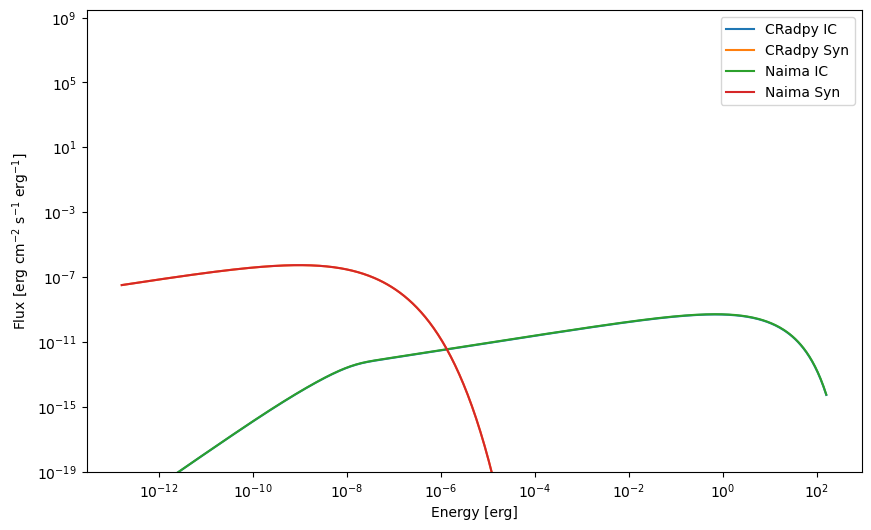

In [9]:
sed_IC = sed_IC.to("erg cm^-2 s^-1 ")
sed_SYN = sed_SYN.to("erg cm^-2 s^-1")
plt.figure(figsize= (10, 6))
plt.xlabel("Energy [erg]")
plt.ylabel("Flux [erg cm$^{-2}$ s$^{-1}$ erg$^{-1}$]")
plt.loglog(spectrum_energy, inverse_compton, label = "CRadpy IC")
plt.loglog(spectrum_energy, synchrotron , label = "CRadpy Syn")
plt.loglog(spectrum_energy, sed_IC, label = "Naima IC")
plt.loglog(spectrum_energy, sed_SYN, label = "Naima Syn")
plt.ylim(1e-19)
plt.legend()

Understanding the SED of InverseCompton and Synchrotron:
- For Synchrotron, the cut-off energy seems to be at 1e-8erg, which can get from the cut-off energy 13TeV electrons interact with B=1e-4G, so we can get the $\rm epsilon_B \simeq B/B_{cr} \times gamma^2 \simeq 10^{-8}erg$
- For InverseCompton, we can find two cut-off one is at $10^{-8}erg$ and the other one is at 1erg, form blackbody photons, it mainly focus at $epsilon\simeq 10^{-15}erg$, so the energy can be computed by $\gamma^2 \epsilon$

